In [17]:
#------------------------------------#
# PHY 152: Assignment 4, Dark Matter #
#  Bryan J Miller, April 28th, 2016  #
#------------------------------------#

# load libraries
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

# plot within notebook
%matplotlib inline

# configuration (adjustable)
samples = 10000        # number of steps
r_MW = 20.0*3.086E19   # [m] the data goes up to 18.5 kpc
delta_r = r_MW/samples # [m] dr

# conversion factors
kpc_m = 3.086E19 # [m kpc^-1] convert kpc to m 

# constants (not adjustable)
G = 6.67408E-11 # [m^3 kg^-1 s^-2] gravitational constant
m_sun = 2.0E30  # [kg] mass of the sun
c = 2.998E8     # [m s^-1] speed of light

# masses/size of the components of the Milky Way
m_b = 1.3E10 # [solar masses] mass of the bulge
a_b = 0.4    # [kpc] scale length of the bulge
m_d = 6.5E10 # [solar masses] mass of the disk
a_d = 4.0    # [kpc] scale length of the disk
m_h = 1.0E9  # [solar masses] mass of the visible halo
a_h = 0.5    # [kpc] scale length of the visible halo

# dark matter values
rho_dm_small = 1.0E-26                       # [kg m^-3] density of DM from slide DarkMatter.pdf (too small)
a_dm = 230.0                                 # [kpc] From big orange book
rho_dm = 3.0E5*(m_sun/np.power(kpc_m, 3.0))  # [solar mass kpc^-3] converted to [kg m^-3]

# define x-axis
r = np.linspace(0.001, r_MW, samples) # can't start from zero

#------------- 1 Rotation Curves -----------------#

# (1 a)
# speed of points on a rotating disk, graph A
# http://www.animations.physics.unsw.edu.au/jw/rolling.htm
def v_disk(r, omega):
    v = r*omega                # omega, is a constant
    return v                   # [m s^-1]

# speed of satalites, graph C
# http://www.physicsclassroom.com/class/circles/Lesson-4/Mathematics-of-Satellite-Motion
def v_sat(r, M):
    v = np.power((G*M/r), 0.5) # M, is central mass
    return v                   # [m s^-1]

# (1 b and 1 c) Flat Rotation Curve
# http://www.astro.cornell.edu/academics/courses/astro201/rotation_curves.htm
# http://ircamera.as.arizona.edu/NatSci102/NatSci102/lectures/darkmatter.htm

print "\n#------------------------------------#"
print "# PHY 152: Assignment 4, Dark Matter #"
print "#  Bryan J Miller, April 28th, 2016  #"
print "#------------------------------------#\n"

# answers to questions 1 (a-c) are on a seperate sheet of paper
print "\n#------------- 1 Rotation Curves ----------------#"
print "1 (a-c): Answers are on a seperate sheet of paper.\n"


#------------------------------------#
# PHY 152: Assignment 4, Dark Matter #
#  Bryan J Miller, April 28th, 2016  #
#------------------------------------#


#------------- 1 Rotation Curves ----------------#
1 (a-c): Answers are on a seperate sheet of paper.



In [20]:
#------------- 2 Rotation Curves : DATA --------------#
# load velocity data
radi, veloc = np.loadtxt("velocity.dat",unpack=True) # must have velocity.data in same folder

errors = range(len(veloc))

# error bars on velocity data
for k in range(len(veloc)):
    errors[k] = veloc[k]*0.2*(k+1)/len(veloc)

#------------- function for finding mass -------------#
# interior mass based on velocity and orbital distance
def mass_v(v, d):
    massv = np.power(v, 2.0)*d/G # [kg]
    return massv

# dM/dr spherical
def dm_dr(r, rho):
    dmdr = 4.0*np.pi*np.power(r, 2.0)*rho # [kg m^-1]
    return dmdr

# dM/dr for the (thin) disk
def dm_dr_d(r, rho):
    dmdrd = 2.0*np.pi*r*rho # [kg m^-1]
    return dmdrd

#------------ density profiles -----------------#
# Plummer sphere, bulge and halo density profile
def rho_bh(m, a, r):
    rhobh = (m/(4*np.pi*np.power(a, 3.0)))*np.power((1+np.power((r/a), 2.0)), -2.5) # [kg m^-3]
    return rhobh

# sphere-shaped halo of old stars and globular clusters density profile
def rho_gc(m, a, r): # weird units, M is in 10^9 solar masses and, a and r are in kpc
    rhogc = m*np.power((a + r), -3.1)*(m_sun/np.power(kpc_m, 3.0)) # converted to [kg m^-3]
    return rhogc

# density profile of the disk
def rho_d(m, a, r):
    rhod = (m/(2.0*np.pi*np.power(a, 2.0)))*np.exp(-r/a) # [kg m^-3]
    return rhod

# density profile for Dark Matter found in the big orange book (Carroll, Ostlie)
def rho_DM(a, r):
    rhoDM = rho_dm*np.power(((r/a)*np.power((1+(r/a)), 2.0)), -1.0) # [kg m^-3]
    return rhoDM

In [21]:
#------------- Density Calculations ---------------#
# density of the bulge
def rho_0(r):
    rho0 = rho_bh(m_b*m_sun, a_b*kpc_m, r)
    return rho0

rho0results = [rho_0(r[x]) for x in range(samples)] # for plotting

# density of the halo
def rho_1(r):
    rho1 = rho_gc(1.0E9, a_h, (r/kpc_m))
    return rho1

rho1results = [rho_1(r[x]) for x in range(samples)] # for plotting

# density of the disk
def rho_2(r):
    rho2 = rho_d(m_d*m_sun, a_d*kpc_m, r)
    return rho2

rho2results = [rho_2(r[x]) for x in range(samples)] # for plotting

# density of the Dark Matter halo
def rho_3(r):
    rho3 = rho_DM(a_dm*kpc_m, r)
    return rho3

rho3results = [rho_3(r[x]) for x in range(samples)] # for plotting

#------------------ mass of each dr shell ----------------#
def mass_dr(option, r):
    dmdr0 = dm_dr(r, rho_0(r))                            # [kg m^-1] bugle dm/dr
    dmdr1 = dm_dr(r, rho_1(r))                            # [kg m^-1] halo dm/dr
    dmdr2 = dm_dr_d(r, rho_2(r))                          # [kg m^-1] disk dm/dr
    dmdr3 = dm_dr(r, rho_3(r))                            # [kg m^-1] DM dm/dr
    m_dr_tot = (dmdr0 + dmdr1 + dmdr2)*delta_r            # [kg] total mass                                                     
    m_dr_disk = dmdr2*delta_r                             # [kg] disk mass
    m_dr_bh = dmdr0*delta_r                               # [kg] bulge mass
    m_dr_gc = dmdr1*delta_r                               # [kg] halo mass
    m_dr_DM = dmdr3*delta_r                               # [kg] dark matter mass
    m_dr_tot_DM = (dmdr0 + dmdr1 + dmdr2 + dmdr3)*delta_r # [kg] total mass + DM
    if option == 1:
        return m_dr_tot
    elif option == 2:
        return m_dr_disk
    elif option == 3:
        return m_dr_bh
    elif option == 4:
        return m_dr_gc
    elif option == 5:
        return m_dr_DM
    elif option == 6:
        return m_dr_tot_DM
    else:
        return 0.0

# generating arrays
mass_tot = [mass_dr(1, r[x]) for x in range(samples)]    # [kg] total
mass_disk = [mass_dr(2, r[x]) for x in range(samples)]   # [kg] disk
mass_bh = [mass_dr(3, r[x]) for x in range(samples)]     # [kg] bulge
mass_gc = [mass_dr(4, r[x]) for x in range(samples)]     # [kg] halo
mass_DM = [mass_dr(5, r[x]) for x in range(samples)]     # [kg] dark matter
mass_tot_DM = [mass_dr(6, r[x]) for x in range(samples)] # [kg] total + DM

# adding up masses, calc velocity, and converting to correct units
# calculations for plotting TOTAL velocity [km/s] vs radius [kpc]
for i in range(samples):
    if i == 0:
        mass_tot[i] = mass_tot[i]
    else:
        mass_tot[i] += mass_tot[(i-1)]
        
vel_tot = [v_sat(r[x], mass_tot[x]) for x in range(samples)] # [m/s] 

for i in range(samples):
    vel_tot[i] = vel_tot[i]/1000.0 # [km/s]

for i in range(samples):
    mass_tot[i] = mass_tot[i]/m_sun # [solar masses]
    
# calculations for plotting DISK velocity [km/s] vs radius [kpc]
for i in range(samples):
    if i == 0:
        mass_disk[i] = mass_disk[i]
    else:
        mass_disk[i] += mass_disk[(i-1)]
        
vel_disk = [v_sat(r[x], mass_disk[x]) for x in range(samples)] # [m/s] 

for i in range(samples):
    vel_disk[i] = vel_disk[i]/1000.0 # [km/s]

for i in range(samples):
    mass_disk[i] = mass_disk[i]/m_sun # [solar masses]
    
# calculations for plotting BULGE velocity [km/s] vs radius [kpc]
for i in range(samples):
    if i == 0:
        mass_bh[i] = mass_bh[i]
    else:
        mass_bh[i] += mass_bh[(i-1)]
        
vel_bh = [v_sat(r[x], mass_bh[x]) for x in range(samples)] # [m/s] 

for i in range(samples):
    vel_bh[i] = vel_bh[i]/1000.0 # [km/s]

for i in range(samples):
    mass_bh[i] = mass_bh[i]/m_sun # [solar masses]

# calculations for plotting HALO velocity [km/s] vs radius [kpc]
for i in range(samples):
    if i == 0:
        mass_gc[i] = mass_gc[i]
    else:
        mass_gc[i] += mass_gc[(i-1)]
        
vel_gc = [v_sat(r[x], mass_gc[x]) for x in range(samples)] # [m/s] 

for i in range(samples):
    vel_gc[i] = vel_gc[i]/1000.0 # [km/s]

for i in range(samples):
    mass_gc[i] = mass_gc[i]/m_sun # [solar masses]
    
# calculations for plotting DARK MATTER velocity [km/s] vs radius [kpc]
for i in range(samples):
    if i == 0:
        mass_DM[i] = mass_DM[i]
    else:
        mass_DM[i] += mass_DM[(i-1)]
        
vel_DM = [v_sat(r[x], mass_DM[x]) for x in range(samples)] # [m/s] 

for i in range(samples):
    vel_DM[i] = vel_DM[i]/1000.0 # [km/s]

for i in range(samples):
    mass_DM[i] = mass_DM[i]/m_sun # [solar masses]
    
# calculations for plotting TOTAL + DM velocity [km/s] vs radius [kpc]
for i in range(samples):
    if i == 0:
        mass_tot_DM[i] = mass_tot_DM[i]
    else:
        mass_tot_DM[i] += mass_tot_DM[(i-1)]
        
vel_tot_DM = [v_sat(r[x], mass_tot_DM[x]) for x in range(samples)] # [m/s] 

for i in range(samples):
    vel_tot_DM[i] = vel_tot_DM[i]/1000.0 # [km/s]

for i in range(samples):
    mass_tot_DM[i] = mass_tot_DM[i]/m_sun # [solar masses]


#------------- 2 Rotation Curves : DATA --------------#
(a) Plot the data with the errorbars. Errors on velocity are proportional to the radius,
    with a maximum of 20% at the outermost radius. Assume the errors on the radius to be negligible.
    The plot is below:



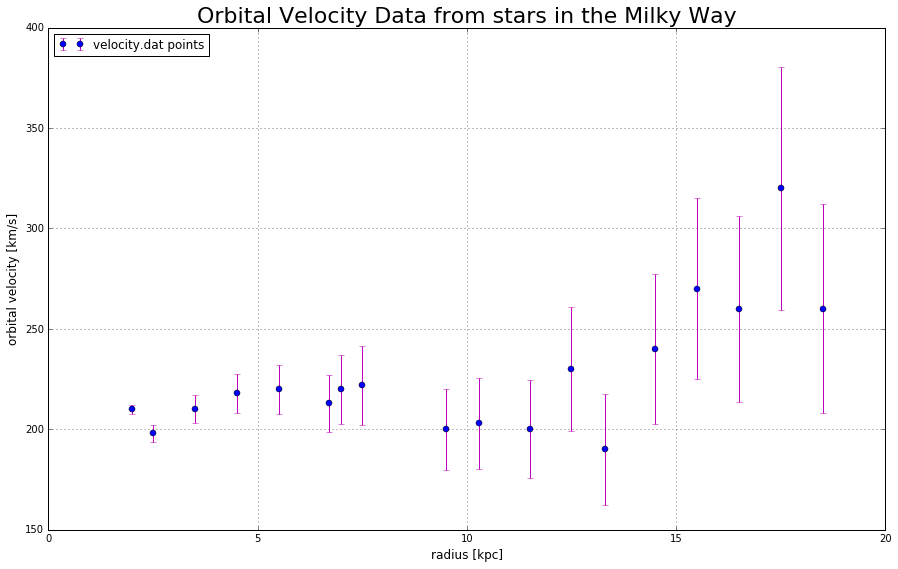

In [22]:
# answer to 2 (a)
print "\n#------------- 2 Rotation Curves : DATA --------------#"
print "(a) Plot the data with the errorbars. Errors on velocity are proportional to the radius,"
print "    with a maximum of 20% at the outermost radius. Assume the errors on the radius to be negligible."
print "    The plot is below:\n"

plt.figure(figsize=(15,9))
plt.errorbar(radi, veloc, yerr=errors, fmt='o', ecolor='m', label='velocity.dat points')
plt.xlim(0.0,20.0)
plt.grid(True)
plt.legend(loc=2)
plt.xlabel('radius [kpc]',fontsize=12)
plt.ylabel('orbital velocity [km/s]',fontsize=12)
plt.title('Orbital Velocity Data from stars in the Milky Way',fontsize=22)
plt.show()


#------------- 2 Rotation Curves : DATA --------------#
(b) Plot rotation curves for each of the components and the combined rotation curve
    (remember, they don’t simply add). For the Milky Way, we know the mass and
    the scale lengths of the visible components.
    The plot is below:



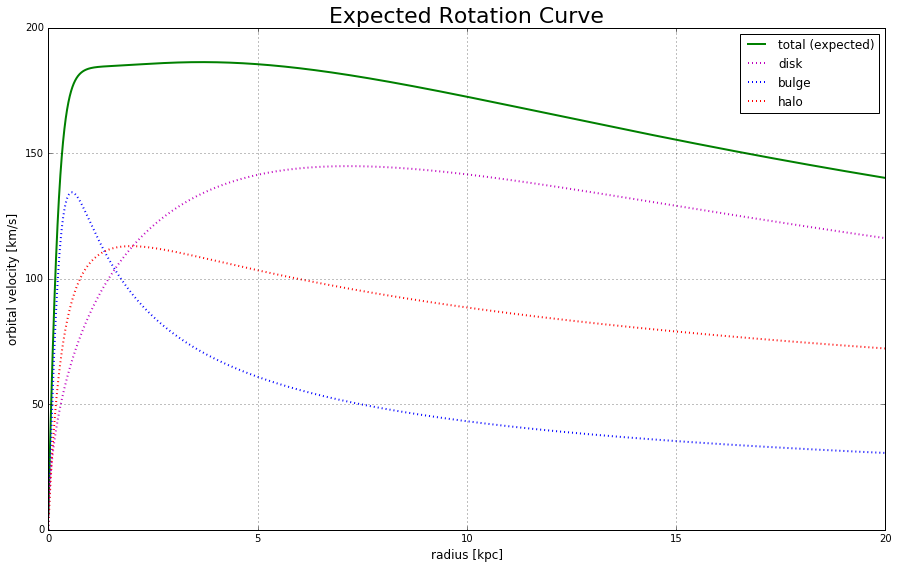

In [23]:
# answer to 2 (b)
print "\n#------------- 2 Rotation Curves : DATA --------------#"
print "(b) Plot rotation curves for each of the components and the combined rotation curve"
print "    (remember, they don’t simply add). For the Milky Way, we know the mass and"
print "    the scale lengths of the visible components."
print "    The plot is below:\n"

# comparing orbital velocity data to expected rotation curve
plt.figure(figsize=(15,9))
plt.plot(r/kpc_m, vel_tot, 'g', linewidth=2, label='total (expected)')
plt.plot(r/kpc_m, vel_disk, 'm:', linewidth=2, label='disk')
plt.plot(r/kpc_m, vel_bh, 'b:', linewidth=2, label='bulge')
plt.plot(r/kpc_m, vel_gc, 'r:', linewidth=2, label='halo')
plt.grid(True)
plt.legend()
plt.xlabel('radius [kpc]',fontsize=12)
plt.ylabel('orbital velocity [km/s]',fontsize=12)
plt.title('Expected Rotation Curve',fontsize=22)
plt.show()


#------------- 2 Rotation Curves : DATA --------------#
(c) Does the total velocity fit the data? What do you need to add?
    Comparing the data to our expected rotation curve:



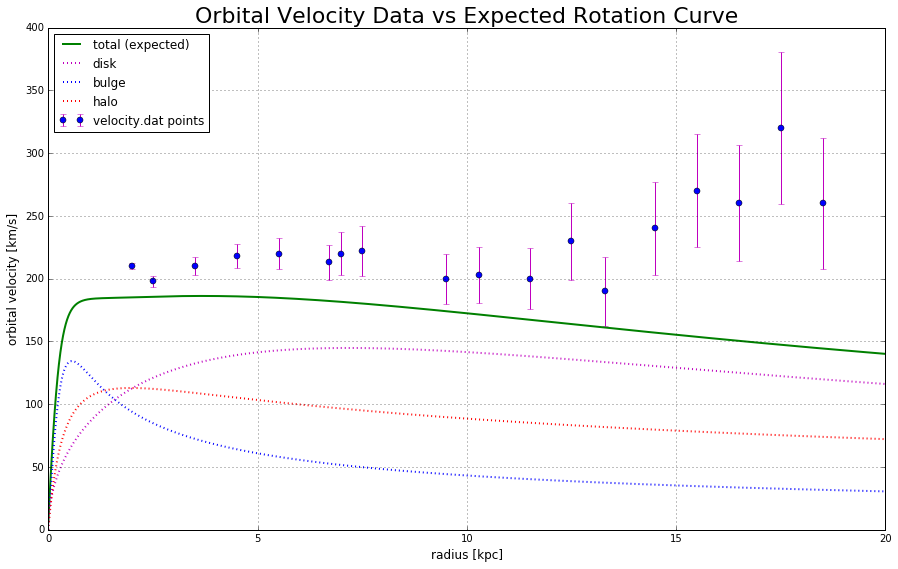

2 (c) continued:
It is clear that the orbital velocity data does not fit the expected rotation curve.
We must add in a large spherical halo of Dark Matter to correct our rotation curve to match observations.



In [24]:
# answer to 2 (c)
print "\n#------------- 2 Rotation Curves : DATA --------------#"
print "(c) Does the total velocity fit the data? What do you need to add?"
print "    Comparing the data to our expected rotation curve:\n"

# plotting expected rotation curve
plt.figure(figsize=(15,9))
plt.errorbar(radi, veloc, yerr=errors, fmt='o', ecolor='m', label='velocity.dat points')
plt.plot(r/kpc_m, vel_tot, 'g', linewidth=2, label='total (expected)')
plt.plot(r/kpc_m, vel_disk, 'm:', linewidth=2, label='disk')
plt.plot(r/kpc_m, vel_bh, 'b:', linewidth=2, label='bulge')
plt.plot(r/kpc_m, vel_gc, 'r:', linewidth=2, label='halo')
plt.grid(True)
plt.legend(loc=2)
plt.xlabel('radius [kpc]',fontsize=12)
plt.ylabel('orbital velocity [km/s]',fontsize=12)
plt.title('Orbital Velocity Data vs Expected Rotation Curve',fontsize=22)
plt.show()

# continuing to answer 2 (c)
print "2 (c) continued:"
print "It is clear that the orbital velocity data does not fit the expected rotation curve."
print "We must add in a large spherical halo of Dark Matter to correct our rotation curve to match observations.\n"


#------------- 2 Rotation Curves : DATA --------------#
(d) Which values for the total mass and the scale parameter for an extra spherical halo would be
    required to match the observed data? Is Plummer sphere the best description?
    Or a slightly modified version (i.e. different exponent)?

I did not use the plummer sphere, it falls off too quickly.
Instead I used the Navarro, Frenk, and White (NFW) density profile.
I found this profile in Carroll and Ostlie, eq. 24.15 or eq 24.52.
The NFW density profile behaves approximately like a r^-2 profile over much of the halo,
but is shallower, approx. r^-1, near the center, and steeper, approx. r^-3, near the edge of the halo.

I also found in the Big Orange Book that the dark matter halo reaches out to about 230 kpc.
DM makes up >95% of the mass of the MW, with most recent studies estimating a mass of (0.8-4.5)E12 solar masses.
Using all this information I got these values for the total mass and the scale parameter:

DM mass: 3.6501e+1

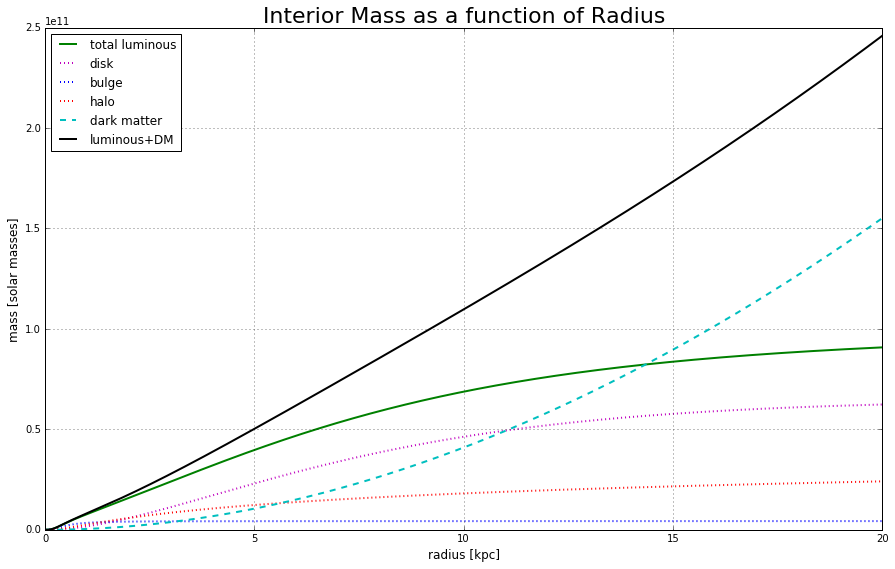


Continue on to see our new rotation curve.



In [25]:
# answer to 2 (d)
print "\n#------------- 2 Rotation Curves : DATA --------------#"
print "(d) Which values for the total mass and the scale parameter for an extra spherical halo would be"
print "    required to match the observed data? Is Plummer sphere the best description?"
print "    Or a slightly modified version (i.e. different exponent)?\n"

print "I did not use the plummer sphere, it falls off too quickly."
print "Instead I used the Navarro, Frenk, and White (NFW) density profile."
print "I found this profile in Carroll and Ostlie, eq. 24.15 or eq 24.52."
print "The NFW density profile behaves approximately like a r^-2 profile over much of the halo,"
print "but is shallower, approx. r^-1, near the center, and steeper, approx. r^-3, near the edge of the halo.\n"

DM_MASS = rho_dm*(np.power(kpc_m, 3.0)/m_sun)*np.power(230.0, 3.0) # [solar masses] mass of spherical halo of DM

print "I also found in the Big Orange Book that the dark matter halo reaches out to about 230 kpc."
print "DM makes up >95% of the mass of the MW, with most recent studies estimating a mass of (0.8-4.5)E12 solar masses."
print "Using all this information I got these values for the total mass and the scale parameter:\n"

print "DM mass: " + str(DM_MASS) + " solar masses"
print "Scale Length: 230.0 kpc\n"

print "Below is a plot of the interior mass, including our new dark matter component:\n"

# plotting interior mass vs radius
plt.figure(figsize=(15,9))
plt.plot(r/kpc_m, mass_tot, 'g', linewidth=2, label='total luminous')
plt.plot(r/kpc_m, mass_disk, 'm:', linewidth=2, label='disk')
plt.plot(r/kpc_m, mass_bh, 'b:', linewidth=2, label='bulge')
plt.plot(r/kpc_m, mass_gc, 'r:', linewidth=2, label='halo')
plt.plot(r/kpc_m, mass_DM, 'c--', linewidth=2, label='dark matter')
plt.plot(r/kpc_m, mass_tot_DM, 'k', linewidth=2, label='luminous+DM')
plt.grid(True)
plt.legend(loc=2)
plt.xlabel('radius [kpc]',fontsize=12)
plt.ylabel('mass [solar masses]',fontsize=12)
plt.title('Interior Mass as a function of Radius',fontsize=22)
plt.show()

print "\nContinue on to see our new rotation curve.\n"


#------------- 2 Rotation Curves : DATA --------------#
Putting it all together we get this beautiful plot:



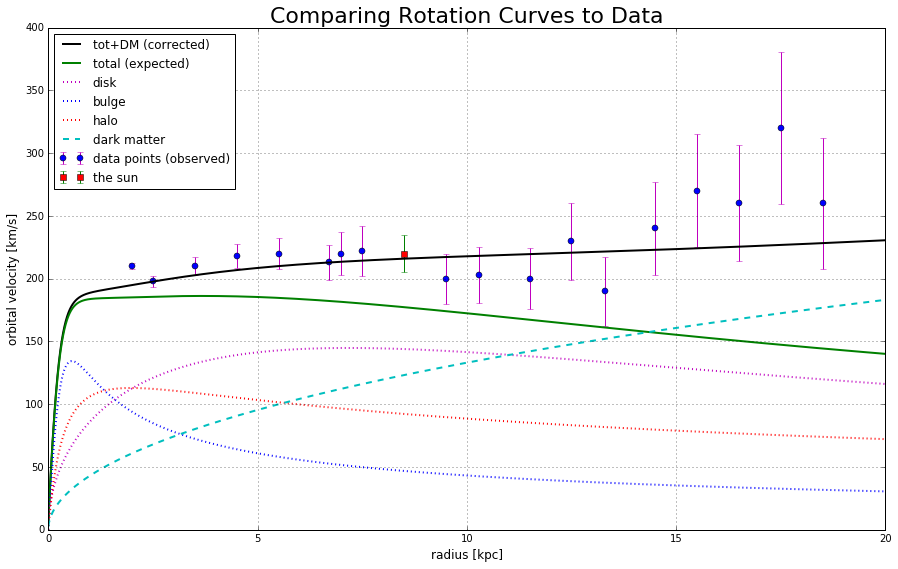


You'll notice that our corrected rotation curve fits the observed data nicely.
I even added in our Sun. You can see that witout dark matter we would have a much lower orbital velocity.



In [26]:
# putting everything together
print "\n#------------- 2 Rotation Curves : DATA --------------#"
print "Putting it all together we get this beautiful plot:\n"

# plotting a combination of all the data, comparing rotation curves to data
plt.figure(figsize=(15,9))
plt.errorbar(radi, veloc, yerr=errors, fmt='o', ecolor='m', label='data points (observed)')
plt.errorbar(8.5, 220.0, yerr=15.0, fmt='rs', ecolor='g', label='the sun') # location and speed of our solar system
plt.plot(r/kpc_m, vel_tot_DM, 'k', linewidth=2, label='tot+DM (corrected)')
plt.plot(r/kpc_m, vel_tot, 'g', linewidth=2, label='total (expected)')
plt.plot(r/kpc_m, vel_disk, 'm:', linewidth=2, label='disk')
plt.plot(r/kpc_m, vel_bh, 'b:', linewidth=2, label='bulge')
plt.plot(r/kpc_m, vel_gc, 'r:', linewidth=2, label='halo')
plt.plot(r/kpc_m, vel_DM, 'c', linestyle='--', linewidth=2, label='dark matter')
plt.grid(True)
plt.legend(loc=2)
plt.xlabel('radius [kpc]',fontsize=12)
plt.ylabel('orbital velocity [km/s]',fontsize=12)
plt.title('Comparing Rotation Curves to Data',fontsize=22)
plt.show()

print "\nYou'll notice that our corrected rotation curve fits the observed data nicely."
print "I even added in our Sun. You can see that witout dark matter we would have a much lower orbital velocity.\n"

In [27]:
#------------------------------------#
# PHY 152: Assignment 4, Dark Matter #
#  Bryan J Miller, April 28th, 2016  #
#------------------------------------#
print "THE END"

THE END
